In [2]:
import pandas as pd

# Veriyi senin için buraya yazdım (Gerçek veri setinden bir parça)
data = {
    'Review': [
        'Wow... Loved this place.', 
        'Crust is not good.', 
        'Not tasty and the texture was just nasty.',
        'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
        'The selection on the menu was great and so were the prices.',
        'Now I am getting angry and I want my damn pho.',
        'Honeslty it didn\'t taste THAT fresh.',
        'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
        'The fries were great too.',
        'A great touch.',
        'Service was very prompt.',
        'Would not go back.',
        'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
        'I tried the Cape Cod ravoli, chicken, with cranberry...MMMMM!',
        'I was disgusted because I was pretty sure that was human hair.',
        'I was shocked because no signs indicate cash only.',
        'Highly recommended.',
        'Waitress was a little slow in service.',
        'This place is not worth your time, let alone Vegas.',
        'did not like at all.',
        'The Burrittos Blah!',
        'The food, amazing.',
        'Service is also cute.',
        'I could care less... The interior is just beautiful.',
        'So they performed.',
        'That\'s right....the red velvet cake.....ohhh this stuff is so good.',
        'They never brought a salad we asked for.',
        'This hole in the wall has great mexican street tacos, and friendly staff.',
        'Took an hour to get our food only 4 tables in restaurant my food was Luke warm, Our sever was running around like he was totally overwhelmed.',
        'The worst was the salmon sashimi.',
        'Also there are combos like a burger, fries, and beer for 23 which is a decent deal.',
        'This was like the final blow!',
        'I found this place by accident and I could not be happier.',
        'seems like a good quick place to grab a bite of some familiar pub food, but do yourself a favor and look elsewhere.',
        'Overall, I like this place a lot.',
        'The only redeeming quality of the restaurant was that it was very inexpensive.',
        'Ample portions and good prices.',
        'Poor service, the waiter made me feel like I was stupid every time he came to the table.',
        'My first visit to Hiro was a delight!',
        'Service sucks.',
        'The shrimp tender and moist.',
        'There is not a deal good enough that would drag me into that establishment again.',
        'Hard to judge whether these sides were good because we were grossed out by the melted styrofoam and didn\'t want to eat it.',
        'Frozen pucks of disgust, with some of the worst people behind the register.',
        'The thing that really makes this place stand out is the food.',
        'It was quite comfortable in the casual skylit dining area.',
        'The sashimis were not fresh.',
        'The ambiance was incredible.',
        'I felt insulted.',
        'The prices were reasonable.'
    ],
    'Liked': [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1]
}

# 1. Veriyi Tabloya (DataFrame) çevir
yorumlar = pd.DataFrame(data)

# 2. Dosya olarak kaydet
yorumlar.to_csv('Restaurant_Reviews.tsv', sep='\t', index=False, quoting=3)

print("✅ Dosya Başarıyla Oluşturuldu ve Yüklendi!")
print(yorumlar.head())
print(f"\nToplam Yorum Sayısı: {len(yorumlar)}")

✅ Dosya Başarıyla Oluşturuldu ve Yüklendi!
                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

Toplam Yorum Sayısı: 50


In [5]:
import re
from nltk.stem.porter import PorterStemmer

# Temizlik araçlarımızı hazırlayalım
ps = PorterStemmer()
stop_words = {'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'of', 'at', 'by', 'for', 'with', 'about', 'to', 'from', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now', 'is', 'are', 'was', 'were', 'have', 'has', 'had', 'this', 'that', 'it'}

derlem = [] # Temizlenmiş cümleleri buraya atacağız

for i in range(len(yorumlar)):
    # A) Harf dışındakileri sil (Noktalama işareti temizliği)
    yorum = re.sub('[^a-zA-Z]', ' ', yorumlar['Review'][i])
    
    # B) Küçük harfe çevir
    yorum = yorum.lower()
    
    # C) Kelimelere böl
    yorum = yorum.split()
    
    # D) Gereksizleri at ve Kök Bul (Stemming)
    # Örnek: "loved" -> "love" olacak
    yorum = [ps.stem(kelime) for kelime in yorum if not kelime in stop_words]
    
    # E) Tekrar birleştir
    yorum = ' '.join(yorum)
    derlem.append(yorum)

print("✅ 2. Adım Tamam: Temizlik Bitti!")
print(f"Örnek: {derlem[0]}")

✅ 2. Adım Tamam: Temizlik Bitti!
Örnek: wow love place


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# En çok kullanılan 1500 kelimeyi seç (Bizde az veri var ama olsun, alışkanlık)
cv = CountVectorizer(max_features = 1500)

# X: Kelimelerin sayısal hali (Girdi)
X = cv.fit_transform(derlem).toarray()

# y: Sonuçlar (1: Beğendi, 0: Beğenmedi)
y = yorumlar['Liked'].values

print("✅ 3. Adım Tamam: Sayılara Dönüştü!")
print(f"Matris Boyutu: {X.shape}")

✅ 3. Adım Tamam: Sayılara Dönüştü!
Matris Boyutu: (50, 211)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Veriyi Böl: %80 Ders Çalışsın (Train), %20 Sınav Olsun (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# 2. Modeli Çağır (Naive Bayes - Metinlerin Efendisi)
classifier = GaussianNB()

# 3. Modeli Eğit (Ders Çalıştır)
classifier.fit(X_train, y_train)

# 4. Sınav Yap (Test verisini sor bakalım bilecek mi?)
y_pred = classifier.predict(X_test)

# 5. Sonuçları Gör
print("🎯 Model Doğruluğu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix (Neyi bildi neyi karıştırdı?):")
print(confusion_matrix(y_test, y_pred))

🎯 Model Doğruluğu (Accuracy): 0.4

Confusion Matrix (Neyi bildi neyi karıştırdı?):
[[1 4]
 [2 3]]


In [8]:
# Yeni bir yorum uyduralım
yeni_yorum = "The food was amazing and I loved it"

# 1. Önce temizlik (Aynı işlemleri buna da yapmalıyız)
yeni_yorum_temiz = re.sub('[^a-zA-Z]', ' ', yeni_yorum)
yeni_yorum_temiz = yeni_yorum_temiz.lower()
yeni_yorum_temiz = yeni_yorum_temiz.split()
yeni_yorum_temiz = [ps.stem(kelime) for kelime in yeni_yorum_temiz if not kelime in stop_words]
yeni_yorum_temiz = ' '.join(yeni_yorum_temiz)

# 2. Sayıya çevir (Transform)
# Dikkat: fit_transform DEĞİL, sadece transform! (Çünkü kelime havuzu sabit kalmalı)
yeni_vektor = cv.transform([yeni_yorum_temiz]).toarray()

# 3. Tahmin et bakalım!
sonuc = classifier.predict(yeni_vektor)

if sonuc[0] == 1:
    print(f"Yorum: '{yeni_yorum}'")
    print("Sonuç: 😍 POZİTİF (Beğendi)")
else:
    print(f"Yorum: '{yeni_yorum}'")
    print("Sonuç: 😡 NEGATİF (Beğenmedi)")

Yorum: 'The food was amazing and I loved it'
Sonuç: 😍 POZİTİF (Beğendi)


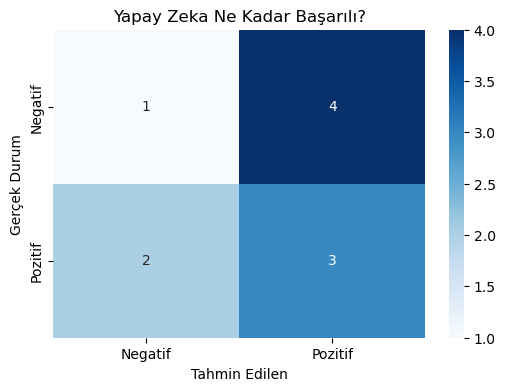

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix'i (Karmaşıklık Matrisi) görselleştirelim
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Durum')
plt.title('Yapay Zeka Ne Kadar Başarılı?')
plt.show()